# Eigenvalues and Eigenvectors and PCA

## Eigenvalues and Eigenvectors

In [1]:
import numpy as np
A = np.array([[1,-1],[0,1],[-1,0]])
print (A)
AT = A.T
print (AT)
C = AT.dot(A)
print (C)

C2 = A.dot(AT)
print (C2)

[[ 1 -1]
 [ 0  1]
 [-1  0]]
[[ 1  0 -1]
 [-1  1  0]]
[[ 2 -1]
 [-1  2]]
[[ 2 -1 -1]
 [-1  1  0]
 [-1  0  1]]


In [2]:
eigenvalues, eigenvectors  = np.linalg.eig(C)
print (eigenvectors)
print (eigenvalues)

# using C2, I find that there are only 2 non zero eigenvalues
eigenvalues2, eigenvectors2  = np.linalg.eig(C2)
print (np.matrix.round(eigenvalues2,4))
print (np.matrix.round(eigenvectors2,4))

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[3. 1.]
[ 3. -0.  1.]
[[ 0.8165 -0.5774  0.    ]
 [-0.4082 -0.5774 -0.7071]
 [-0.4082 -0.5774  0.7071]]


In [3]:
Lambda = np.diag(eigenvalues)
print (Lambda)

# from 18_SparseMatrices and Sorting Eigenvalues
import scipy.sparse as sp
import scipy.sparse.linalg

ADom = np.array([[1,-1, 5],[0,1, 2],[-1,0, -1]])
eigenv1, eigenvec2  = np.linalg.eig(ADom)

# in ascending order
idx = np.real(eigenv1).argsort()[::-1]
print (idx)
print (eigenv1[idx[0]], eigenv1[idx[1]], eigenv1[idx[2]])
print (eigenv1)

# in descending order
idx = np.real(eigenv1).argsort()[::-1]
print (idx)
print (eigenv1[idx[0]], eigenv1[idx[1]], eigenv1[idx[2]])
print (eigenv1)

[[3. 0.]
 [0. 1.]]
[2 1 0]
(1.3443892368835102+0j) (-0.1721946184417553-2.1055503310879122j) (-0.1721946184417553+2.1055503310879122j)
[-0.17219462+2.10555033j -0.17219462-2.10555033j  1.34438924+0.        j]
[2 1 0]
(1.3443892368835102+0j) (-0.1721946184417553-2.1055503310879122j) (-0.1721946184417553+2.1055503310879122j)
[-0.17219462+2.10555033j -0.17219462-2.10555033j  1.34438924+0.        j]


In [5]:
print (C.dot(eigenvectors[:,0]))
print (eigenvalues[0]*eigenvectors[:,0])

[ 2.12132034 -2.12132034]
[ 2.12132034 -2.12132034]


In [6]:
print (C.dot(eigenvectors[:,1]))
print (eigenvalues[1]*eigenvectors[:,1])

[0.70710678 0.70710678]
[0.70710678 0.70710678]


In [7]:
print( C.dot(eigenvectors))
print (eigenvectors.dot(Lambda))

[[ 2.12132034  0.70710678]
 [-2.12132034  0.70710678]]
[[ 2.12132034  0.70710678]
 [-2.12132034  0.70710678]]


In [9]:
# this is wrong, SO DO not USE IT
print (Lambda.dot(eigenvectors))

[[ 2.12132034  2.12132034]
 [-0.70710678  0.70710678]]


In [10]:
# All eigenvectors are orthonormal 
print (np.linalg.norm(eigenvectors[:,0]))
print (np.linalg.norm(eigenvectors[:,1]))

0.9999999999999999
0.9999999999999999


In [11]:
# U * U.T is the identity
print (eigenvectors.dot(eigenvectors.T))

[[1. 0.]
 [0. 1.]]


In [12]:
# Transpose and Inverse are the same
print (np.linalg.inv(eigenvectors))
print (eigenvectors.T)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## Principal Components 

In [13]:
# The principal components are: 
# Before Rotation
print (" A ")
print (A)
# Now we rotate
P = A.dot(eigenvectors)
print (" P ")
print (P)
# and the A is rotated on different axis
print ("Note: there are three vectors as this A is a 3x2 matrix. Each row is a 2-dim vector")

 A 
[[ 1 -1]
 [ 0  1]
 [-1  0]]
 P 
[[ 1.41421356  0.        ]
 [-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
Note: there are three vectors as this A is a 3x2 matrix. Each row is a 2-dim vector


In [14]:
# If i do the following I recover the eigenvalues
print (P.T.dot(P))

[[3.00000000e+00 2.23711432e-17]
 [2.23711432e-17 1.00000000e+00]]


In [15]:
# the eigenvector element [0,0] is 
print (eigenvectors[0,0])
# We extract theta from cos(theta) =  eigenvector[0,0]
print (np.arccos(eigenvectors[0,0]))
print (-np.pi/4.0) # This is what the note says
import math as ma
print (ma.acos(eigenvectors[0,0]))
# and in degrees
print (ma.degrees(ma.acos(eigenvectors[0,0])), "degrees")

0.7071067811865475
0.7853981633974484
-0.7853981633974483
0.7853981633974484
45.00000000000001 degrees


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

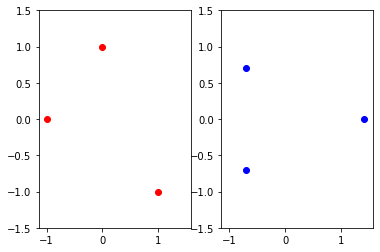

In [17]:
xData_T = P[:,0]
yData_T = P[:,1]

xData = A[:,0]
yData = A[:,1]

fig,(axleft,axright) = plt.subplots(nrows=1,ncols=2, sharex=True)
axleft.scatter(xData, yData,  color="r")
axleft.set_ylim(-1.5,1.5)
axright.scatter(xData_T, yData_T,   color="b")
axright.set_ylim(-1.5,1.5)
plt.show()

# look at the point <1,-1> 
# which after translating (multiplying by the eigenvectors matrix) 
# becomes <1.41421356,0>